In [ ]:
import random
import math
from math import sqrt

prob_win = random.random()
print(f"Randomly generated probability of winning a single fight is: {prob_win:.2f}")

# new tournament
n_fights = 20

print(f"\nNow, let's analyze the new tournament of {n_fights} fights.")

x_wins_str = input(f"Enter the number of wins (x) you want to calculate the probability for (between 0 and {n_fights}): ")
x_wins = int(x_wins_str)

y_wins_str = input(f"Enter the minimum number of wins (y) you want to calculate the probability for (between 0 and {n_fights}): ")
y_wins = int(y_wins_str)


def simple_combinations(n, k):
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    if k > n // 2:
        k = n - k

    result = 1
    for i in range(k):
        result = result * (n - i) // (i + 1)
    return result

p = prob_win
n = n_fights
x = x_wins

combinations_nx = simple_combinations(n, x)
prob_exactly_x = combinations_nx * (p ** x) * ((1 - p) ** (n - x))

print(f"\n(i) The probability of you winning exactly {x_wins} fights in the new tournament is: {prob_exactly_x:.4f}")

prob_at_most_y = 0
for k in range(y_wins + 1):
    combinations_nk = simple_combinations(n, k)
    prob_at_most_y += combinations_nk * (p ** k) * ((1 - p) ** (n - k))

prob_more_than_y = 1 - prob_at_most_y

print(f"(ii) The probability of you winning more than {y_wins} fights in the new tournament is: {prob_more_than_y:.4f}")

Randomly generated probability of winning a single fight is: 0.72

Now, let's analyze the new tournament of 20 fights.
Enter the number of wins (x) you want to calculate the probability for (between 0 and 20): 11
Enter the minimum number of wins (y) you want to calculate the probability for (between 0 and 20): 12

(i) The probability of you winning exactly 11 fights in the new tournament is: 0.0499
(ii) The probability of you winning more than 12 fights in the new tournament is: 0.8228


In [ ]:
probabilities = {}
for k in range(n_fights + 1):
    combinations_nk = simple_combinations(n_fights, k)
    prob_exactly_k = combinations_nk * (prob_win ** k) * ((1 - prob_win) ** (n_fights - k))
    probabilities[k] = prob_exactly_k

print("Probabilities of winning exactly k fights:")
for k, prob in probabilities.items():
    print(f"k={k}: {prob:.4f}")

Probabilities of winning exactly k fights:
k=0: 0.0000
k=1: 0.0000
k=2: 0.0000
k=3: 0.0000
k=4: 0.0000
k=5: 0.0000
k=6: 0.0001
k=7: 0.0006
k=8: 0.0023
k=9: 0.0077
k=10: 0.0216
k=11: 0.0499
k=12: 0.0950
k=13: 0.1486
k=14: 0.1888
k=15: 0.1919
k=16: 0.1523
k=17: 0.0911
k=18: 0.0386
k=19: 0.0103
k=20: 0.0013


  Mean (Expected Value): 14.3516
  Standard Deviation: 2.0133


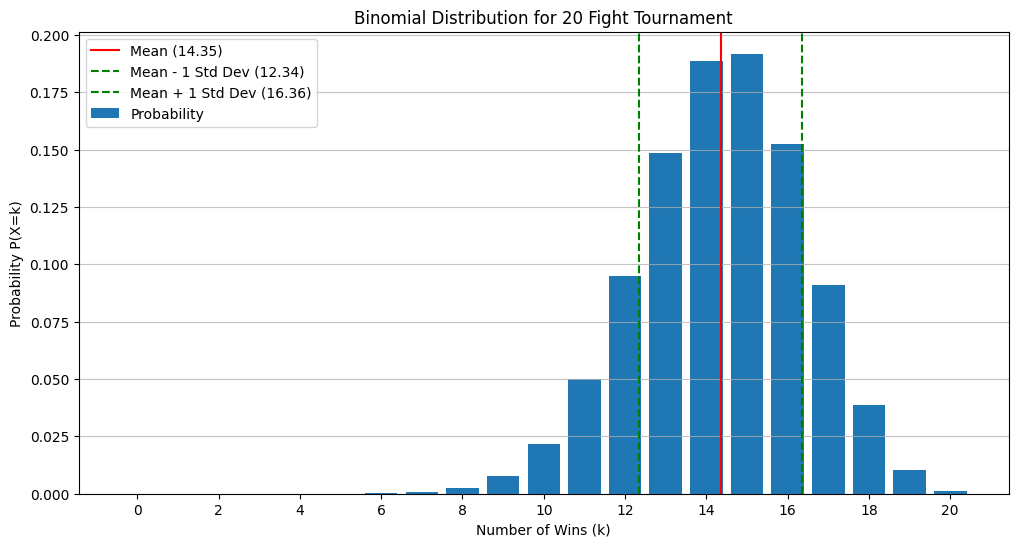

In [ ]:
import matplotlib.pyplot as plt


probabilities_all_k_20 = {}
for k in range(n_fights + 1):
    combinations_nk = simple_combinations(n_fights, k)
    prob_exactly_k = combinations_nk * (prob_win ** k) * ((1 - prob_win) ** (n_fights - k))
    probabilities_all_k_20[k] = prob_exactly_k

wins_20 = list(probabilities_all_k_20.keys())
probs_20 = list(probabilities_all_k_20.values())

mean_20 = n_fights * prob_win
std_dev_20 = sqrt(n_fights * prob_win * (1 - prob_win))
print(f"  Mean (Expected Value): {mean_20:.4f}")
print(f"  Standard Deviation: {std_dev_20:.4f}")

plt.figure(figsize=(12, 6))
plt.bar(wins_20, probs_20, label='Probability')

plt.axvline(x=mean_20, color='red', linestyle='-', label=f'Mean ({mean_20:.2f})')

plt.axvline(x=mean_20 - std_dev_20, color='green', linestyle='--', label=f'Mean - 1 Std Dev ({mean_20 - std_dev_20:.2f})')
plt.axvline(x=mean_20 + std_dev_20, color='green', linestyle='--', label=f'Mean + 1 Std Dev ({mean_20 + std_dev_20:.2f})')

plt.xlabel("Number of Wins (k)")
plt.ylabel("Probability P(X=k)")
plt.title(f"Binomial Distribution for {n_fights} Fight Tournament")

plt.xticks(range(0, n_fights + 1, 2))

plt.grid(axis='y', alpha=0.75)

plt.legend()

plt.show()


In [ ]:
tournament_results = {}

tournament_sizes = [50, 100, 500, 1000]

for n_fights in tournament_sizes:
    print(f"\nAnalyzing tournament size: {n_fights} fights")

    if y_wins >= x_wins:
        y_wins = x_wins -1
        if y_wins < 0:
          y_wins = 0

    print(f"  Randomly generated x_wins: {x_wins}")
    print(f"  Randomly generated y_wins: {y_wins}")

    n = n_fights
    x = x_wins
    p = prob_win

    combinations_nx = simple_combinations(n, x)
    prob_exactly_x = combinations_nx * (p ** x) * ((1 - p) ** (n - x))

    prob_at_most_y = 0
    for k in range(y_wins + 1):
        combinations_nk = simple_combinations(n, k)
        prob_at_most_y += combinations_nk * (p ** k) * ((1 - p) ** (n - k))

    prob_more_than_y = 1 - prob_at_most_y


    mean = n_fights * prob_win
    std_dev = sqrt(n_fights * prob_win * (1 - prob_win))

    print(f"  Mean (Expected Value): {mean:.4f}")
    print(f"  Standard Deviation: {std_dev:.4f}")

    tournament_results[n_fights] = {
        'prob_exactly_x': prob_exactly_x,
        'prob_more_than_y': prob_more_than_y,
        'mean': mean,
        'std_dev': std_dev
    }



Analyzing tournament size: 50 fights
  Randomly generated x_wins: 11
  Randomly generated y_wins: 10
  Mean (Expected Value): 35.8789
  Standard Deviation: 3.1832

Analyzing tournament size: 100 fights
  Randomly generated x_wins: 11
  Randomly generated y_wins: 10
  Mean (Expected Value): 71.7578
  Standard Deviation: 4.5018

Analyzing tournament size: 500 fights
  Randomly generated x_wins: 11
  Randomly generated y_wins: 10
  Mean (Expected Value): 358.7891
  Standard Deviation: 10.0663

Analyzing tournament size: 1000 fights
  Randomly generated x_wins: 11
  Randomly generated y_wins: 10
  Mean (Expected Value): 717.5782
  Standard Deviation: 14.2359


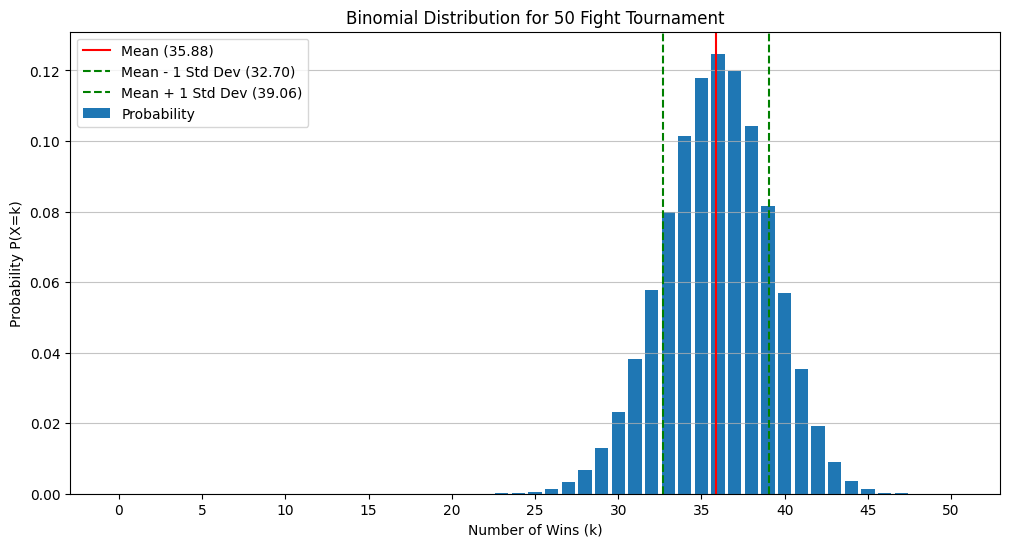

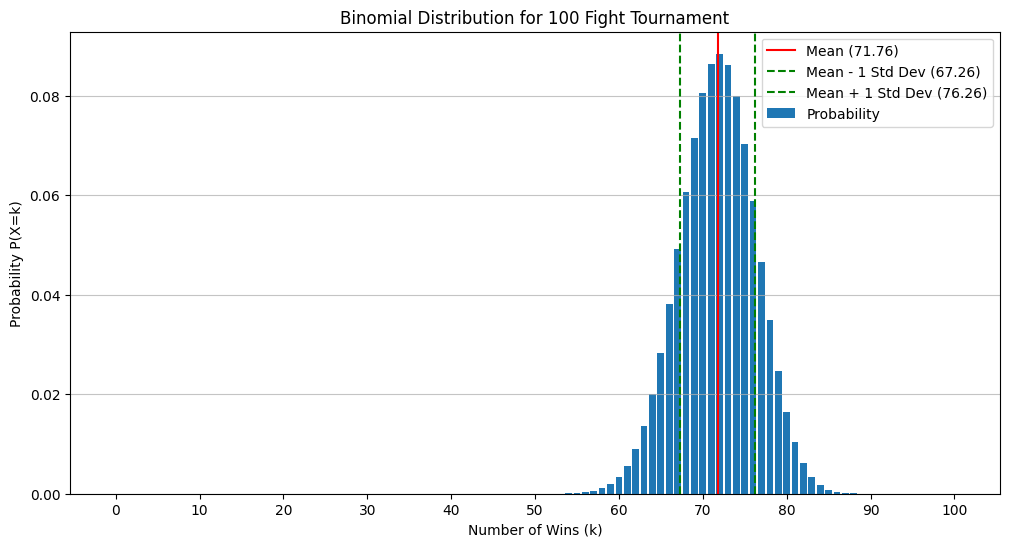

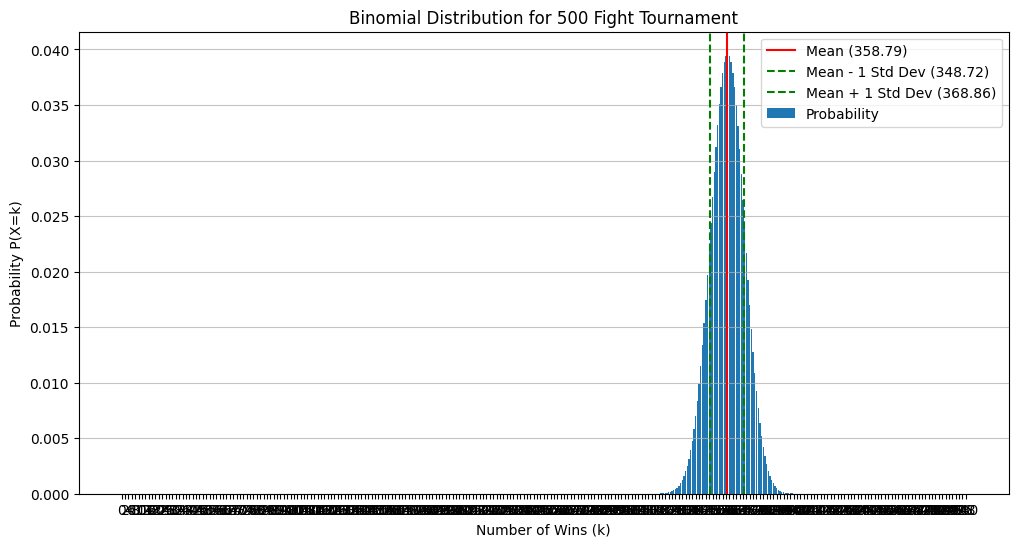

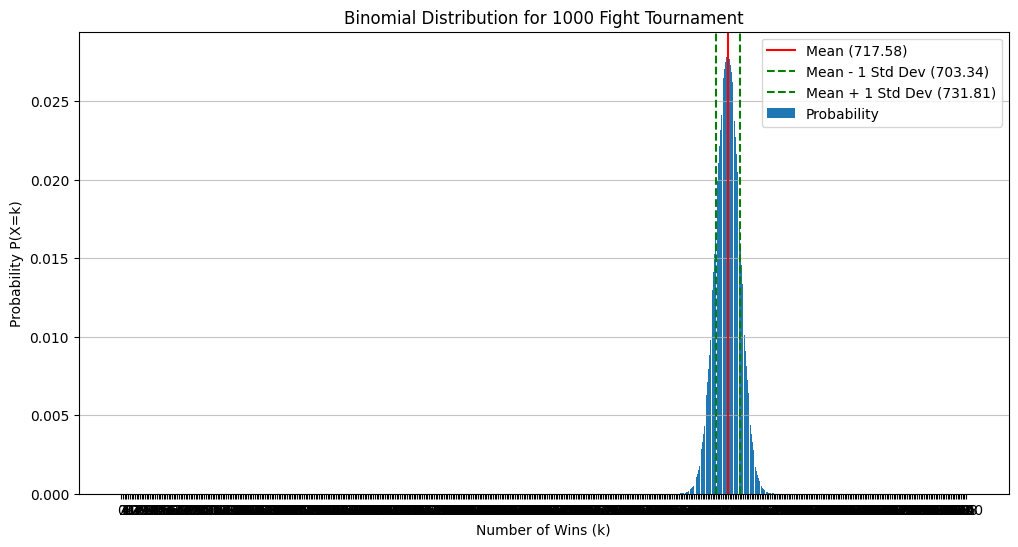

In [ ]:
for n_fights, results in tournament_results.items():
    probabilities_all_k = {}
    for k in range(n_fights + 1):
        combinations_nk = simple_combinations(n_fights, k)
        prob_exactly_k = combinations_nk * (prob_win ** k) * ((1 - prob_win) ** (n_fights - k))
        probabilities_all_k[k] = prob_exactly_k

    wins = list(probabilities_all_k.keys())
    probs = list(probabilities_all_k.values())

    plt.figure(figsize=(12, 6))
    plt.bar(wins, probs, label='Probability')

    mean = results['mean']
    std_dev = results['std_dev']

    plt.axvline(x=mean, color='red', linestyle='-', label=f'Mean ({mean:.2f})')

    plt.axvline(x=mean - std_dev, color='green', linestyle='--', label=f'Mean - 1 Std Dev ({mean - std_dev:.2f})')
    plt.axvline(x=mean + std_dev, color='green', linestyle='--', label=f'Mean + 1 Std Dev ({mean + std_dev:.2f})')


    plt.xlabel("Number of Wins (k)")
    plt.ylabel("Probability P(X=k)")
    plt.title(f"Binomial Distribution for {n_fights} Fight Tournament")

    if n_fights == 50:
        plt.xticks(range(0, n_fights + 1, 5))
    elif n_fights == 100:
        plt.xticks(range(0, n_fights + 1, 10))
    else:
        plt.xticks(range(0, n_fights + 1, 2))


    plt.grid(axis='y', alpha=0.75)

    plt.legend()

    plt.show()